In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


In [3]:
data= [[10000, 68.32, 68.35, 68.30],
[20000, 136.78, 136.68, 136.80],
[30000, 204.98, 205.02, 204.98],
[40000, 273.85, 273.85, 273.80],
[50000, 342.70, 342.63, 342.63],
[60000, 411.30, 411.35, 411.28],
[70000, 480.65, 480.60, 480.63],
[80000, 549.85, 549.85, 549.83],
[90000, 619.00, 619.02, 619.10],
[100000, 688.70, 688.62, 688.58]]

In [4]:
df=pd.DataFrame(data)
df=df.rename(columns={0: "load", 1: "run_1",2: "run_2", 3: "run_3"})
df

,load,run_1,run_2,run_3
0,10000,68.32,68.35,68.30
1,20000,136.78,136.68,136.80
2,30000,204.98,205.02,204.98
3,40000,273.85,273.85,273.80
4,50000,342.70,342.63,342.63
5,60000,411.30,411.35,411.28
6,70000,480.65,480.60,480.63
7,80000,549.85,549.85,549.83
8,90000,619.00,619.02,619.10
9,100000,688.70,688.62,688.58


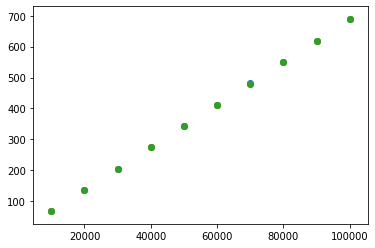

In [5]:
plt.scatter(df.load, df.run_1)
plt.scatter(df.load, df.run_2)
plt.scatter(df.load, df.run_3)

plt.show()

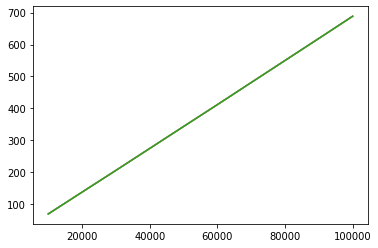

In [6]:
x = df.load
y = df.run_1
y2 = df.run_2
y3 = df.run_3

fig, ax = plt.subplots()

ax.plot(x, y)
ax.plot(x, y2)
ax.plot(x, y3)
plt.show()

In [26]:
X = df.iloc[:, 0].values.reshape(-1, 1) 
Y = df.iloc[:, 1].values.reshape(-1, 1) 
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y) 
Y_pred = linear_regressor.predict(X)

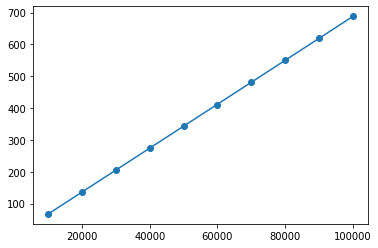

In [8]:
plt.scatter(X, Y)
plt.plot(X, Y_pred)
plt.show()

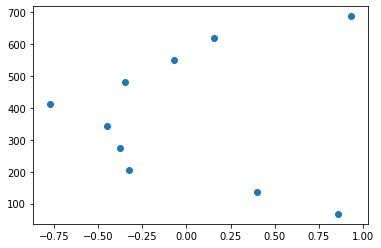

In [19]:
import matplotlib.pyplot as plt
residuals = Y - Y_pred
plt.scatter(residuals,Y_pred)

plt.show()

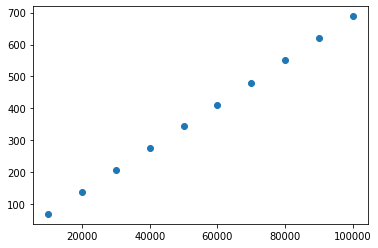

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
degree = 4
#polyreg_scaled = make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression
#polyreg_scaled.fit(X,Y)
Y_pred_2=np.polyfit(df.load,df.run_1,3)
#Y_pred_2 = polyreg_scaled.predict(X) # make predictions
plt.scatter(df.load, df.run_1)
#plt.plot(df.run_1, Y_pred_2)
plt.show()

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols('load ~ run_1+run_2+run_3', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   load   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.929e+05
Date:                Sun, 01 Aug 2021   Prob (F-statistic):           6.96e-16
Time:                        22:47:48   Log-Likelihood:                -57.372
No. Observations:                  10   AIC:                             122.7
Df Residuals:                       6   BIC:                             124.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    214.2537     66.232      3.235      0.0

C:\Users\samru\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
